<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Breast-cancer-classification" data-toc-modified-id="Breast-cancer-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Breast cancer classification</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objective</a></span></li></ul></li><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing libraries</a></span><ul class="toc-item"><li><span><a href="#Importing-and-analyzing-the-dataset" data-toc-modified-id="Importing-and-analyzing-the-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing and analyzing the dataset</a></span></li></ul></li><li><span><a href="#Graphic-analyses" data-toc-modified-id="Graphic-analyses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graphic analyses</a></span></li><li><span><a href="#Building-the-classifiers" data-toc-modified-id="Building-the-classifiers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building the classifiers</a></span></li></ul></div>

# Breast cancer classification

## Objective

The objective here is to build a classifier that predict breast cancer cells into benign and malignant

# Importing libraries

In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
from itertools import chain
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics
import eli5
import pandas_profiling

import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px

## Importing and analyzing the dataset

In [4]:
df_cancer = pd.read_csv('D:\Pos_graduacao\Dataset_Breast_Cancer/data.csv')

In [5]:
profile = pandas_profiling.ProfileReport(df_cancer, minimal = True)
profile

build report structure: 100%|██████████| 1/1 [00:10<00:00, 10.92s/it]


As we can see, the feature "Unnamed32" has no values, so we will drop it

In [6]:
df_cancer.drop(['Unnamed: 32'], axis = 1, inplace = True)

Now, I am going to create a map for the targets, '0' for benign type and '1' for malignant type

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Transform and map diagnosis
diagnosis_le = LabelEncoder()
diagnosis_labels = diagnosis_le.fit_transform(df_cancer["diagnosis"])
df_cancer["diagnosis"] = diagnosis_labels

df_cancer.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


Here, I will creat 3 new dataframes, according to the statistcal information that the features carries (mean, se and worst)

In [8]:
#Agrupamento em 3 partes, contendo informações de média, erro padrão, e piores medidas

index_id = df_cancer[df_cancer.columns[:2]]


df_cancer_mean = df_cancer[df_cancer.columns[:11]]
df_cancer_se = pd.concat([index_id, df_cancer[df_cancer.columns[12:22]]], axis = 1)
df_cancer_worst = pd.concat([index_id, df_cancer[df_cancer.columns[23:]]], axis = 1)

In [9]:
df_cancer_mean

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397


# Graphic analyses

Gráfico contendo a quantidade diagnósticos de câncer malignos e benignos

In [10]:
benigno_sum = (df_cancer['diagnosis'] == 0).sum()
maligno_sum = (df_cancer['diagnosis'] == 1).sum()

trace = go.Bar(x = (benigno_sum, maligno_sum), y = ['Benign', 'Malignant'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = go.Layout(title =  'Total of cancer diagnosis',
                   xaxis = dict(showgrid = True,
                                gridcolor = "#eee"),
                   yaxis = dict(showgrid = True,
                                gridcolor = "#eee"),
                   plot_bgcolor = "white",
                   paper_bgcolor = "white")
                    
fig = dict(data = trace, layout = layout)
py.iplot(fig)

Function to plot histogram

In [11]:
#Function to plot distplot

df_benign = df_cancer[df_cancer["diagnosis"] == 0]
df_malignant = df_cancer[df_cancer["diagnosis"] == 1]

def plot_distplot(feature):
    hist_data = [df_benign[feature], df_malignant[feature]]
    colors = ['#FFD700', '#7EC0EE']
    group_labels = ["Benign", "Malignant"]
    
    #Create distplot with curve type set to 'normal'
    dist_plot = ff.create_distplot(hist_data, group_labels, show_hist = True, bin_size = 0.6, curve_type = "kde", colors = colors)
    
    dist_plot.update_layout(title_text = "Histogram of " + feature,
                    xaxis = dict(showgrid = True,
                                gridcolor = "#eee"),
                    yaxis = dict(showgrid = True,
                                gridcolor = "#eee"),
                    plot_bgcolor = "white",
                    paper_bgcolor = "white")
    
    dist_plot.show()

In [12]:
plot_distplot("radius_mean")

In [11]:
plot_distplot("texture_mean")

In [12]:
plot_distplot("compactness_mean")

In [13]:
#Funcition to use Boxplot

def plot_boxplot(feature):
    
    y0 = df_benign[feature]
    y1 = df_malignant[feature]
    
    fig = go.Figure()
    
    fig.add_trace(go.Box(
                    y = y0, name = "Benign", marker_color = "#FFD700", boxpoints = "all"))
    fig.add_trace(go.Box(
                    y = y1, name = "Malignant", marker_color = '#7EC0EE',  boxpoints = "all"))
    fig.update_layout(title_text = "Boxplot of " + feature,
                    xaxis = dict(showgrid = True,
                                gridcolor = "#eee"),
                    yaxis = dict(showgrid = True,
                                gridcolor = "#eee"),
                    plot_bgcolor = "white",
                    paper_bgcolor = "white")
    fig.show()

In [14]:
plot_boxplot("smoothness_mean")

In [15]:
plot_boxplot("concave points_mean")

Function to plot scatterplot graphics

In [17]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = df_malignant[feat1],
        y = df_malignant[feat2],
        name = 'Malignant',
        mode = 'markers', 
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = df_benign[feat1],
        y = df_benign[feat2],
        name = 'Benign',
        mode = 'markers',
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False, showgrid = True, gridcolor = "#eee"),
                  xaxis = dict(title = feat1, zeroline = False, showgrid = True,gridcolor = "#eee"),
                  plot_bgcolor = "white",
                  paper_bgcolor = "white"
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [18]:
plot_feat1_feat2('perimeter_mean','area_mean')

After the analyses made on the plots, we can assume that the cell's size is a good indicator if the breast cancer is benign or malignant.

For the classification task, I will be working only with the dataset that contains features with mean values

Correlation matrix

In [19]:
correlation = df_cancer_mean.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                   text = ["Correlation"]
                  )
layout = go.Layout(dict(title = 
                            dict(text = 'Correlation Matrix', 
                                 font = dict(size = 18)),                          
                        autosize = True,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

By the correlation matrix, we can make the following assumptions:

- The features "radius_mean", "perimeter_mean" and "area_mean" are highly correlated. So, I will drop "perimeter_mean" and "area_mean";
- The features "concavity_mean" and "concave points_mean" are highly correlated. So, I will drop "concave points_mean" 

In [20]:
df_cancer_mean.drop(["perimeter_mean", "area_mean", "concave points_mean"], axis = 1, inplace = True)

# Building the classifiers

In [21]:
from sklearn.model_selection import train_test_split

X = df_cancer_mean.drop(("diagnosis"), axis = 1)
y = df_cancer_mean["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The accuracy of the classifier is 0.9035087719298246


Text(0.5, 0.98, 'Confusion matrix')

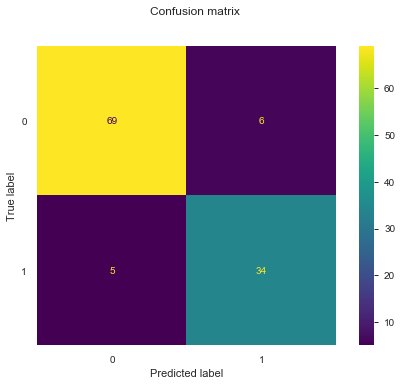

In [31]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

predict = tree_clf.predict(X_test)
print("The accuracy of the classifier is {}".format(accuracy_score(y_test, predict)))

disp = plot_confusion_matrix(tree_clf, X_test, y_test)
disp.figure_.suptitle("Confusion matrix")


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



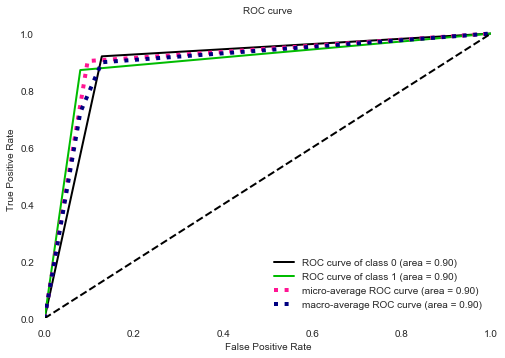

In [56]:
from scikitplot.metrics import plot_roc_curve

predict_proba = tree_clf.predict_proba(X_test)

plot_roc_curve(y_test, predict_proba,
               title = "ROC curve",
               title_fontsize = 'medium')
plt.show()

Let's see if we can improve our model using GridSearch

In [96]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

parameters = {
        "criterion": ["gini", "entropy"],
        "max_depth": [2, 3, 4, 5, 6],
        "min_samples_leaf": [5, 10, 15, 20, 25, 30],
        "max_features": ["auto", "sqrt", "log2"],
        }

grid = GridSearchCV(clf, parameters, n_jobs = 4, scoring = "neg_log_loss")
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                   

The accuracy of the classifier is 0.9122807017543859


Text(0.5, 0.98, 'Confusion matrix')

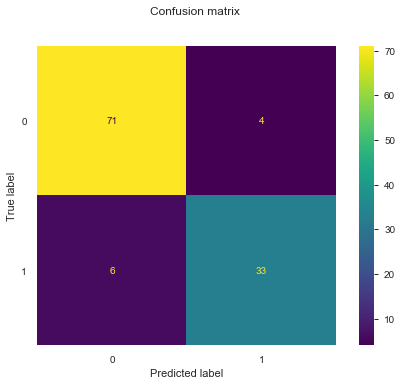

In [97]:
predict = grid.predict(X_test)
print("The accuracy of the classifier is {}".format(accuracy_score(y_test, predict)))

disp = plot_confusion_matrix(grid, X_test, y_test)
disp.figure_.suptitle("Confusion matrix")

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



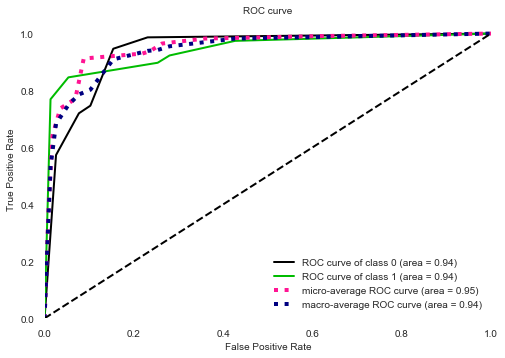

In [123]:
predict_proba = grid.predict_proba(X_test)

plot_roc_curve(y_test, predict_proba,
               title = "ROC curve",
               title_fontsize = 'medium')
plt.show()

We can use the library "eli5" to check if if the assumption of the size of a breast cancer cell is the most important feature for the classifier

In [136]:
import eli5
from IPython.display import display

feature_names = list(df_cancer_mean.columns[1:])

display(eli5.show_weights(tree_clf, feature_names = feature_names, show = ["feature_importances"]))

Weight,Feature
0.6095,radius_mean
0.2197,concavity_mean
0.0612,diagnosis
0.0516,texture_mean
0.0478,smoothness_mean
0.0103,symmetry_mean
0,compactness_mean


We can conclude that indeed, the size of a cancer cell is the most important feature, following by the concavity